In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


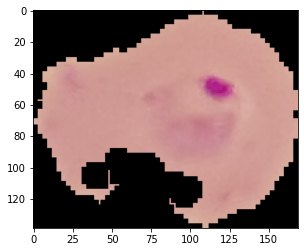

In [ ]:
import matplotlib.pyplot as plt
im = plt.imread('/content/drive/MyDrive/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144348_cell_139.png')
plt.imshow(im)
plt.show()

In [ ]:
pip install split-folders

In [ ]:
# # define paths
# path_train="/content/drive/MyDrive/cell_images"

In [ ]:
!pip install split-folders[full]

In [ ]:
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
import splitfolders 
splitfolders.ratio("/content/drive/MyDrive/cell_images/", output="output", seed=47, ratio=(.8, .2)) # default values

Copying files: 10000 files [02:56, 56.77 files/s]


In [ ]:
trainpath = '/content/output/train'
testpath = '/content/output/val'

In [ ]:
code = {'Parasitized':0, 'Uninfected':1}

def getcode(n):
  for x, y in code.items():
    if n == y:
      return x

In [ ]:
import os
import glob as gb
import cv2

x_train = []
y_train = []
for folder in os.listdir(trainpath):
  files = gb.glob(pathname = str(trainpath + '/' + folder + '/*.png'))
  for file in files:
    image = cv2.imread(file)
    image_array = cv2.resize(image, (150,150))
    x_train.append(list(image_array))
    y_train.append(code[folder])

In [ ]:
x_test = []
y_test = []
for folder in os.listdir(testpath):
  files = gb.glob(pathname = str(trainpath + '/' + folder + '/*.png'))
  for file in files:
    image = cv2.imread(file)
    image_array = cv2.resize(image, (150,150))
    x_test.append(list(image_array))
    y_test.append(code[folder])

#VGG - 19


In [ ]:
import tensorflow as tf

In [ ]:
vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet',
                                        input_shape=(150, 150, 3))
vgg.trainable = False
# Freeze the layers
for layer in vgg.layers:
    layer.trainable = False
   
base_vgg = vgg
base_out = base_vgg.output
pool_out = tf.keras.layers.Flatten()(base_out)
hidden1 = tf.keras.layers.Dense(512, activation='relu')(pool_out)
drop1 = tf.keras.layers.Dropout(rate=0.3)(hidden1)
hidden2 = tf.keras.layers.Dense(512, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden2)

out = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model1 = tf.keras.Model(inputs=base_vgg.input, outputs=out)
model1.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
history = model1.fit(
     x = x_train,
     y = y_train,
     steps_per_epoch=100,
     epochs=100)

Epoch 1/100
100/100 [==============================] - 57s 427ms/step - loss: 1.9614 - accuracy: 0.8345
Epoch 2/100
100/100 [==============================] - 43s 430ms/step - loss: 0.1964 - accuracy: 0.9268
Epoch 3/100
100/100 [==============================] - 43s 431ms/step - loss: 0.1569 - accuracy: 0.9406
Epoch 4/100
100/100 [==============================] - 43s 431ms/step - loss: 0.1435 - accuracy: 0.9455
Epoch 5/100
100/100 [==============================] - 43s 431ms/step - loss: 0.1412 - accuracy: 0.9473
Epoch 6/100
100/100 [==============================] - 43s 430ms/step - loss: 0.1172 - accuracy: 0.9557
Epoch 7/100
100/100 [==============================] - 43s 429ms/step - loss: 0.0932 - accuracy: 0.9636
Epoch 8/100
100/100 [==============================] - 43s 430ms/step - loss: 0.0887 - accuracy: 0.9649
Epoch 9/100
100/100 [==============================] - 43s 430ms/step - loss: 0.0977 - accuracy: 0.9638
Epoch 10/100
100/100 [==============================] - 43s 430m

In [ ]:
preds = model1.predict(x_test)

In [ ]:
y_pred = np.where(preds > 0.5, 1, 0)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy Score :',history.history['accuracy'] )

[[3989   11]
 [   1 3999]]
Accuracy Score : [0.8345000147819519, 0.9267500042915344, 0.940625011920929, 0.9455000162124634, 0.9472500085830688, 0.9557499885559082, 0.9636250138282776, 0.9648749828338623, 0.9637500047683716, 0.9566249847412109, 0.9623749852180481, 0.9628750085830688, 0.9631249904632568, 0.9676250219345093, 0.9727500081062317, 0.9677500128746033, 0.9753749966621399, 0.9753749966621399, 0.9753749966621399, 0.9695000052452087, 0.9716249704360962, 0.9785000085830688, 0.9771249890327454, 0.9736250042915344, 0.9732499718666077, 0.9736250042915344, 0.9682499766349792, 0.9806249737739563, 0.9822499752044678, 0.981124997138977, 0.9775000214576721, 0.9789999723434448, 0.9801250100135803, 0.9833750128746033, 0.9832500219345093, 0.9776250123977661, 0.9754999876022339, 0.9815000295639038, 0.984375, 0.9825000166893005, 0.9858750104904175, 0.9850000143051147, 0.9792500138282776, 0.9860000014305115, 0.981124997138977, 0.9803749918937683, 0.9829999804496765, 0.9883750081062317, 0.990125

In [ ]:
print(history.history)

{'loss': [1.9613704681396484, 0.19641679525375366, 0.15691518783569336, 0.14354296028614044, 0.14122065901756287, 0.11721310019493103, 0.09317295998334885, 0.0886845663189888, 0.09773654490709305, 0.10502208024263382, 0.0917295292019844, 0.08863221853971481, 0.09083597362041473, 0.08183159679174423, 0.06666436046361923, 0.0763578861951828, 0.056918397545814514, 0.06146844103932381, 0.06847166270017624, 0.07487749308347702, 0.06697800755500793, 0.052445463836193085, 0.055507153272628784, 0.06410166621208191, 0.05941925197839737, 0.0657273605465889, 0.08544396609067917, 0.0470668263733387, 0.042160920798778534, 0.046703170984983444, 0.0524202398955822, 0.05210847035050392, 0.043412402272224426, 0.037947334349155426, 0.046490203589200974, 0.06591656059026718, 0.052610136568546295, 0.04377046599984169, 0.03579248860478401, 0.04317174106836319, 0.033743809908628464, 0.030528418719768524, 0.04625062271952629, 0.03545217588543892, 0.04106765240430832, 0.0422249510884285, 0.03975527733564377, 

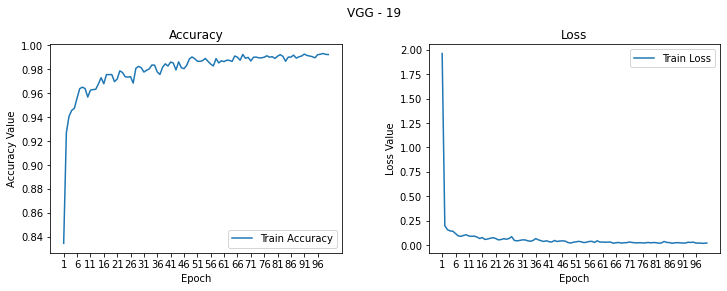

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG - 19', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model1.save('drive/MyDrive/VGG')

INFO:tensorflow:Assets written to: drive/MyDrive/VGG/assets


In [ ]:
model1.save_weights('drive/MyDrive/VGG-Weights')

#DenseNet 121


In [ ]:
dnet = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet',
                                        input_shape=(150, 150, 3))
dnet.trainable = False
# Freeze the layers
for layer in dnet.layers:
    layer.trainable = False
   
base_dnet = dnet
base_out = base_dnet.output
pool_out = tf.keras.layers.Flatten()(base_out)
hidden1 = tf.keras.layers.Dense(512, activation='relu')(pool_out)
drop1 = tf.keras.layers.Dropout(rate=0.3)(hidden1)
hidden2 = tf.keras.layers.Dense(512, activation='relu')(drop1)
drop2 = tf.keras.layers.Dropout(rate=0.3)(hidden2)

out = tf.keras.layers.Dense(1, activation='sigmoid')(drop2)

model2 = tf.keras.Model(inputs=base_dnet.input, outputs=out)
model2.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
history = model2.fit(
     x = x_train,
     y = y_train,
     steps_per_epoch=100,
     epochs=100)

Epoch 1/100
100/100 [==============================] - 36s 253ms/step - loss: 5.8332 - accuracy: 0.7130
Epoch 2/100
100/100 [==============================] - 26s 255ms/step - loss: 0.3615 - accuracy: 0.8468
Epoch 3/100
100/100 [==============================] - 25s 253ms/step - loss: 0.3914 - accuracy: 0.8235
Epoch 4/100
100/100 [==============================] - 25s 255ms/step - loss: 0.3370 - accuracy: 0.8227
Epoch 5/100
100/100 [==============================] - 25s 253ms/step - loss: 0.3666 - accuracy: 0.8389
Epoch 6/100
100/100 [==============================] - 25s 253ms/step - loss: 0.3412 - accuracy: 0.8389
Epoch 7/100
100/100 [==============================] - 25s 255ms/step - loss: 0.3266 - accuracy: 0.8504
Epoch 8/100
100/100 [==============================] - 25s 255ms/step - loss: 0.3229 - accuracy: 0.8625
Epoch 9/100
100/100 [==============================] - 25s 254ms/step - loss: 0.2833 - accuracy: 0.8795
Epoch 10/100
100/100 [==============================] - 25s 252m

In [ ]:
preds = model2.predict(x_test)

In [ ]:
y_pred = np.where(preds > 0.5, 1, 0)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy Score :',history.history['accuracy'] )

[[3878  122]
 [ 128 3872]]
Accuracy Score : [0.7129999995231628, 0.846750020980835, 0.8234999775886536, 0.8227499723434448, 0.8388749957084656, 0.8388749957084656, 0.8503749966621399, 0.862500011920929, 0.8794999718666077, 0.8859999775886536, 0.8882499933242798, 0.8621249794960022, 0.8546249866485596, 0.8838750123977661, 0.8856250047683716, 0.8669999837875366, 0.8882499933242798, 0.887374997138977, 0.903249979019165, 0.8982499837875366, 0.8960000276565552, 0.8922500014305115, 0.9163749814033508, 0.8917499780654907, 0.8942499756813049, 0.8916249871253967, 0.8972499966621399, 0.8456249833106995, 0.8528749942779541, 0.8918750286102295, 0.8963750004768372, 0.8998749852180481, 0.8820000290870667, 0.8813750147819519, 0.9110000133514404, 0.9236249923706055, 0.9045000076293945, 0.9161249995231628, 0.906000018119812, 0.8992499709129333, 0.8538749814033508, 0.8857499957084656, 0.8768749833106995, 0.9012500047683716, 0.9292500019073486, 0.9223750233650208, 0.9171249866485596, 0.9278749823570251, 

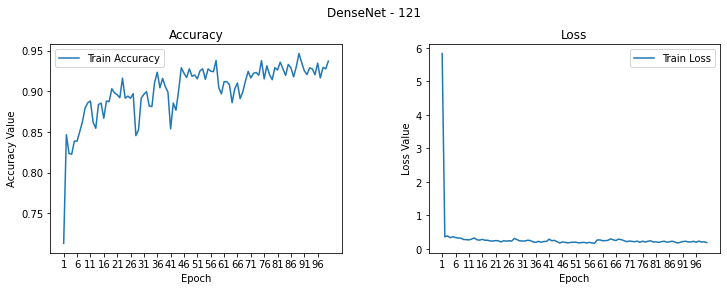

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('DenseNet - 121', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model2.save('drive/MyDrive/DenseNet')

INFO:tensorflow:Assets written to: drive/MyDrive/DenseNet/assets


In [ ]:
model2.save_weights('drive/MyDrive/DenseNet-Weights')